In [1]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from tabulate import tabulate


In [2]:
df, meta = pyreadstat.read_sav("/Users/juansebastianquintanacontreras/Desktop/Proyecto_seminario/CACU1985A2019.sav")
print(df.head())  # Ver las primeras filas del DataFrame

  COD_DPTO COD_MUNIC A_DEFUN SIT_DEFUN      COD_INST  \
0       11       001       1         2                 
1       76       001       1         2                 
2       08       001       1         1                 
3       15       001       1         1    1500100021   
4       76       001       1         1  760010379901   

                              NOM_INST     ANO MES SEXO EST_CIVIL  ...  \
0                                       1996.0  11    2         1  ...   
1                                       2007.0  01    2         1  ...   
2                                       1998.0  04    2         3  ...   
3                H SAN RAFAEL DE TUNJA  2005.0  04    2         1  ...   
4  E.S.E. HOSPITAL UNIVERSITARIO DEL V  2006.0  09    2         1  ...   

  C_ANT32 C_PAT1 C_PAT2 C_BAS1 C_MCM1 IDPROFCER CAUSA_666_667 CAU_HOMOL  \
0                         1809                                      025   
1                         C539                            209       

In [3]:
df['ANO'] = df['ANO'].astype(int)
df = df.sort_values(by='ANO')

In [4]:
df

,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,COD_INST,NOM_INST,ANO,MES,SEXO,EST_CIVIL,...,C_ANT32,C_PAT1,C_PAT2,C_BAS1,C_MCM1,IDPROFCER,CAUSA_666_667,CAU_HOMOL,QUINQ,EDAD2
48930,76,001,1,2,,,1985,07,2,2,...,,,,1809,,,,025,85A89,85y+
17083,11,001,1,1,,,1985,05,2,3,...,,,,1809,,,,025,85A89,50a54
17084,11,001,1,2,,,1985,05,2,2,...,,,,1809,,,,025,85A89,50a54
17085,11,001,1,2,,,1985,05,2,2,...,,,,1809,,,,025,85A89,50a54
17086,11,001,1,2,,,1985,07,2,2,...,,,,1809,,,,025,85A89,50a54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,47,1,1,1,,,2019,,2,5,...,,,,C539,,1,207,25,15A19,35a39
6784,47,1,1,1,,,2019,,2,1,...,,,,C539,,1,207,25,15A19,35a39
6783,47,720,1,2,,,2019,,2,4,...,,,,C539,,1,207,25,15A19,35a39
6797,63,1,1,1,,,2019,,2,2,...,,,,C539,,1,207,25,15A19,35a39


In [5]:
conteo_valores = df['A_DEFUN'].value_counts()
print(conteo_valores)

A_DEFUN
1    46697
2     4470
3      281
Name: count, dtype: int64


In [6]:
df.columns

Index(['COD_DPTO', 'COD_MUNIC', 'A_DEFUN', 'SIT_DEFUN', 'COD_INST', 'NOM_INST',
       'ANO', 'MES', 'SEXO', 'EST_CIVIL', 'gru_ed1', 'gru_ed2', 'NIVEL_EDU',
       'MUERTEPORO', 'SIMUERTEPO', 'OCUPACION', 'IDPERTET', 'CODPRES',
       'CODPTORE', 'CODMUNRE', 'AREA_RES', 'SEG_SOCIAL', 'IDADMISALU',
       'IDCLASADMI', 'pman_muer', 'CONS_EXP', 'CODOCUR', 'CODMUNOC',
       'c_muerte', 'ASIS_MED', 'CAUSA_MULT', 'C_DIR1', 'C_DIR12', 'C_ANT1',
       'C_ANT12', 'C_ANT2', 'C_ANT22', 'C_ANT3', 'C_ANT32', 'C_PAT1', 'C_PAT2',
       'C_BAS1', 'C_MCM1', 'IDPROFCER', 'CAUSA_666_667', 'CAU_HOMOL', 'QUINQ',
       'EDAD2'],
      dtype='object')

In [7]:
df_juan = df[df.columns[-16:]]
df_juan

,C_DIR12,C_ANT1,C_ANT12,C_ANT2,C_ANT22,C_ANT3,C_ANT32,C_PAT1,C_PAT2,C_BAS1,C_MCM1,IDPROFCER,CAUSA_666_667,CAU_HOMOL,QUINQ,EDAD2
48930,,,,,,,,,,1809,,,,025,85A89,85y+
17083,,,,,,,,,,1809,,,,025,85A89,50a54
17084,,,,,,,,,,1809,,,,025,85A89,50a54
17085,,,,,,,,,,1809,,,,025,85A89,50a54
17086,,,,,,,,,,1809,,,,025,85A89,50a54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,,,,,,,,,,C539,,1,207,25,15A19,35a39
6784,,,,,,,,,,C539,,1,207,25,15A19,35a39
6783,,,,,,,,,,C539,,1,207,25,15A19,35a39
6797,,,,,,,,,,C539,,1,207,25,15A19,35a39


## Contexto de Variables en el DataFrame `df_juan`

A continuación, se describe el significado de cada variable en el DataFrame.

| Variable    | Descripción                                                                         |
| ----------- | ----------------------------------------------------------------------------------- |
| `C_DIR12`   | Código de la segunda causa de defunción informada en el renglón a).                 |
| `C_ANT1`    | Causas Antecedentes 1.                                                              |
| `C_ANT12`   | Código de la segunda causa de defunción informada en el renglón b).                 |
| `C_ANT2`    | Causas Antecedentes 2.                                                              |
| `C_ANT22`   | Código de la segunda causa de defunción informada en el renglón c).                 |
| `C_ANT3`    | Causas Antecedentes 3.                                                              |
| `C_ANT32`   | Código de la segunda causa de defunción informada en el renglón d).                 |
| `C_PAT1`    | Otros estados patológicos importantes.                                              |
| `C_PAT2`    | Código de la causa de defunción informada en otros estados patológicos importantes. |
| `C_BAS1`    | Código de la causa básica de la defunción.                                          |
| `C_MCM1`    | Código de la causa de defunción informada en muerte sin certificación médica.       |
| `IDPROFCER` | Profesión de quien certifica la defunción. Posibles valores:                        |
| `CAUSA_666_667` | Causa agrupada con base en la Lista 6/67 de la OPS. Ejemplos:                   |
| `CAU_HOMOL`   | Causa básica agrupada con base en la Lista 105 Colombia (No usar esta variable).  |
| `QUINQ`       | No usar esta variable.                                                            |
| `EDAD2`       | Edad en rangos quinquenales.                                                      |


`IDPROFCER`:
1. Médico
2. Enfermero
3. Auxiliar de enfermería
4. Promotor(a) de salud
5. Funcionario de registro civil
6. Médico Legista
7. Sin información 
----------------------------------------------------------------------------------------------------

`CAUSA_666_667`:
- 202 T. MALIGNO DEL COLON
- 203 T. MALIGNO DE LOS ÓRGANOS DIGESTIVOS Y DEL PERITONEO, EXCLUYENDO ESTÓMAGO Y COLON
- 210 T. MALIGNO DE LA PRÓSTATA 
----------------------------------------------------------------------------------------------------




In [8]:
info_df = df_juan.info()
missing_values = df_juan.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 51448 entries, 48930 to 27855
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   C_DIR12        51448 non-null  object
 1   C_ANT1         51448 non-null  object
 2   C_ANT12        51448 non-null  object
 3   C_ANT2         51448 non-null  object
 4   C_ANT22        51448 non-null  object
 5   C_ANT3         51448 non-null  object
 6   C_ANT32        51448 non-null  object
 7   C_PAT1         51448 non-null  object
 8   C_PAT2         51448 non-null  object
 9   C_BAS1         51448 non-null  object
 10  C_MCM1         51448 non-null  object
 11  IDPROFCER      51448 non-null  object
 12  CAUSA_666_667  51448 non-null  object
 13  CAU_HOMOL      51448 non-null  object
 14  QUINQ          51448 non-null  object
 15  EDAD2          51448 non-null  object
dtypes: object(16)
memory usage: 6.7+ MB


##  Descripción General del Dataset

- **Total de registros**: 51,448
- **Número de variables**: 16
- **Tipo de datos**: Todas las variables son categóricas (tipo object)
- **Datos faltantes**: No hay valores nulos en ninguna columna (hasta el momento)

In [9]:
nulos = df_juan.isna().sum()
espacios_blanco = (df_juan.astype(str).apply(lambda x: x.str.strip() == "")).sum()
comillas = (df_juan.astype(str).apply(lambda x: x.str.strip() == '"')).sum()

# Calcular porcentajes
total_registros = len(df_juan)
porc_nulos = (nulos / total_registros * 100).round(2)
porc_espacios = (espacios_blanco / total_registros * 100).round(2)
porc_comillas = (comillas / total_registros * 100).round(2)

# Crear DataFrame de resumen
resumen_valores = pd.DataFrame({
    'Columna': df_juan.columns,
    'Valores Nulos': nulos.values,
    '% Nulos': porc_nulos.values,
    'Espacios Blanco': espacios_blanco.values,
    '% Espacios': porc_espacios.values,
    'Solo Comillas': comillas.values,
    '% Comillas': porc_comillas.values
})

# Ordenar por problemas más frecuentes
resumen_valores = resumen_valores.sort_values(
    by=['Valores Nulos', 'Espacios Blanco', 'Solo Comillas'], 
    ascending=False
)

# Formatear con tabulate
headers = [
    'Columna', 
    'Valores Nulos', '% Nulos', 
    'Espacios Blanco', '% Espacios', 
    'Solo Comillas', '% Comillas'
]

print("\nRESUMEN DE LOS DATOS")
print(tabulate(resumen_valores, headers=headers, tablefmt='grid', showindex=False, floatfmt=".2f"))


RESUMEN DE LOS DATOS
+---------------+-----------------+-----------+-------------------+--------------+-----------------+--------------+
| Columna       |   Valores Nulos |   % Nulos |   Espacios Blanco |   % Espacios |   Solo Comillas |   % Comillas |
+===============+=================+===========+===================+==============+=================+==============+
| C_ANT32       |               0 |      0.00 |             49563 |        96.34 |            1709 |         3.32 |
+---------------+-----------------+-----------+-------------------+--------------+-----------------+--------------+
| C_MCM1        |               0 |      0.00 |             49524 |        96.26 |            1726 |         3.35 |
+---------------+-----------------+-----------+-------------------+--------------+-----------------+--------------+
| C_DIR12       |               0 |      0.00 |             49490 |        96.19 |            1706 |         3.32 |
+---------------+-----------------+-----------+---

## Analisi de datos faltantes

1. **Variables C_ANT***:  
   - Las versiones "2" (C_ANT32, C_ANT22, C_ANT12) muestran >95% espacios en blanco
   - Las versiones base (C_ANT3, C_ANT2) tienen menor porcentaje de espacios

2. **Variables de Patología**:
   - C_PAT2 (95.18%) tiene más espacios que C_PAT1 (82.66%)

3. **Variables de Identificación**:
   - IDPROFCER muestra 61.73% espacios en blanco pero 0% comillas

4. **Variables Consistente Limpias**:
   - CAU_HOMOL y QUINQ no presentan ningún tipo de problema

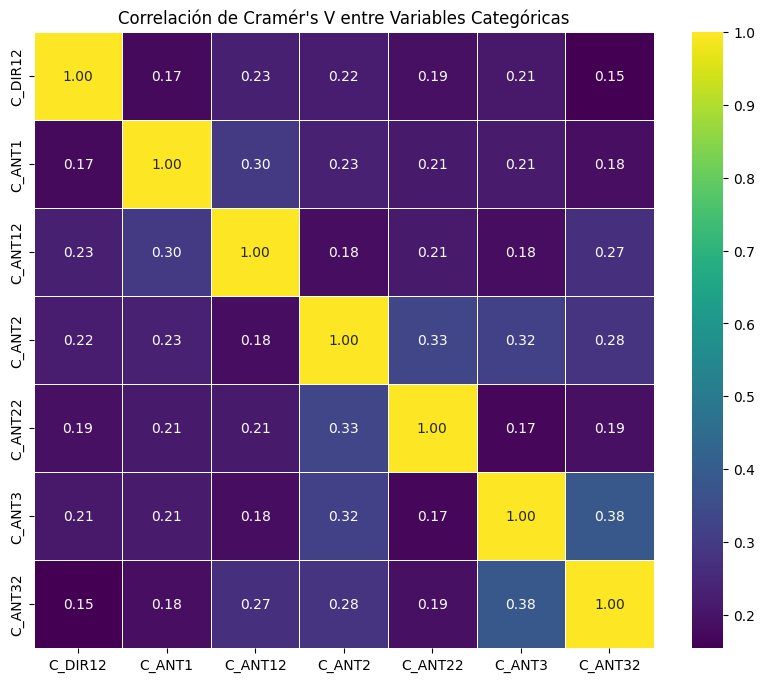

In [10]:
# Variables categóricas a analizar
categorical_vars = ["C_DIR12", "C_ANT1", "C_ANT12", "C_ANT2", "C_ANT22", "C_ANT3", "C_ANT32"]

# Crear una función para calcular Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Crear una matriz de correlación de Cramér's V
corr_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars, dtype=float)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1.0  
        else:
            corr_matrix.loc[var1, var2] = cramers_v(df_juan[var1].fillna("missing"), df_juan[var2].fillna("missing"))

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlación de Cramér's V entre Variables Categóricas")
plt.show()


## Interpretación de Resultados

1. **Asociaciones Notables**:
   - La mayor asociación observada es entre C_ANT3 y C_ANT32 (V = 0.38)
   - C_ANT2 muestra asociación moderada con C_ANT22 (V = 0.33) y C_ANT3 (V = 0.32)
   - C_ANT1 tiene su mayor asociación con C_ANT12 (V = 0.30)

2. **Correlaciones**:
   - La mayoría de valores se encuentran en el rango 0.15-0.30
   - C_DIR12 muestra las asociaciones más bajas con todas las variables (0.15-0.23)
   - Las variables con sufijos numéricos similares tienden a mostrar asociaciones ligeramente más altas
   - No se observan asociaciones significativas (V > 0.5) entre ninguna variable
   - Todas las asociaciones caen en el rango considerado como débil

### Cada valor en C_DIR12

<class 'pandas.core.series.Series'>
Index: 65 entries, N19 to J960
Series name: count
Non-Null Count  Dtype
--------------  -----
65 non-null     int64
dtypes: int64(1)
memory usage: 1.0+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/3179698443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/3179698443.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha


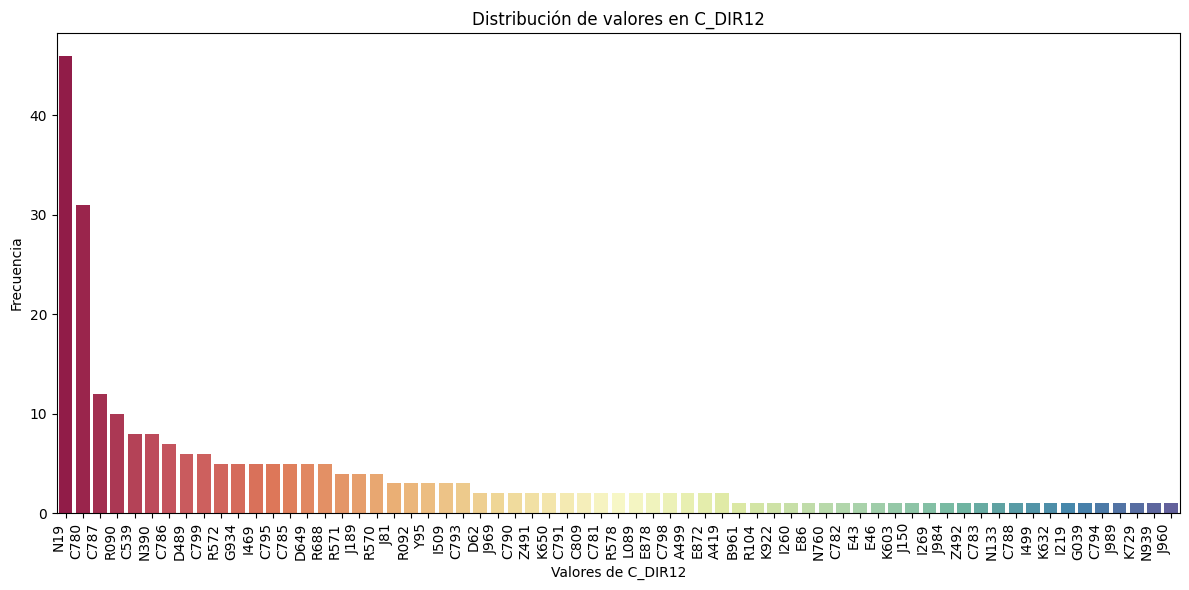

In [11]:
frecuencia = df_juan['C_DIR12'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia.info()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_DIR12")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_DIR12")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha

plt.tight_layout()
plt.show()

## Análisis de la distribución de valores en C_DIR12  
  
- El valor `N19` tiene la mayor frecuencia, superando las 40 ocurrencias.  
- Los siguientes valores con alta frecuencia son `C780`, `C787`, y `R090`, aunque con una diferencia notable respecto al primero.  
- La mayoría de los valores presentan una frecuencia baja.  

### Analisis de "C_ANT1", "C_ANT2", "C_ANT3"

In [12]:
variables = ["C_ANT1", "C_ANT2", "C_ANT3"]
for var in variables:
    # Calcular frecuencias
    frecuencia = df_juan[var].value_counts()
    frecuencia = frecuencia.drop(labels=['', '"'], errors='ignore')
    frecuencia = frecuencia.reset_index()
    frecuencia.columns = [var, "Frecuencia"]
    frecuencia = frecuencia.sort_values(by="Frecuencia", ascending=False)
    
    # Calcular porcentaje
    total = frecuencia["Frecuencia"].sum()
    frecuencia["Porcentaje"] = (frecuencia["Frecuencia"] / total * 100).round(2)
    
    # Formatear para mostrar
    frecuencia["Frecuencia (%)"] = frecuencia.apply(
        lambda x: f"{x['Frecuencia']} ({x['Porcentaje']}%)", axis=1)
    
    # Mostrar con tabulate
    print(f"\n TABLA DE FRECUENCIA PARA: {var}\n")
    print(tabulate(
        frecuencia.head(10)[[var, "Frecuencia (%)"]], 
        headers=[var, "Frecuencia (%)"],
        tablefmt='grid',
        showindex=False,
        stralign='left',
        numalign='right'
    ))
    print("\n" + "═"*60 + "\n")



 TABLA DE FRECUENCIA PARA: C_ANT1

+----------+------------------+
| C_ANT1   | Frecuencia (%)   |
+==========+==================+
| C539     | 8976 (31.6%)     |
+----------+------------------+
| C780     | 1708 (6.01%)     |
+----------+------------------+
| C80X     | 1079 (3.8%)      |
+----------+------------------+
| R688     | 906 (3.19%)      |
+----------+------------------+
| D649     | 881 (3.1%)       |
+----------+------------------+
| N390     | 770 (2.71%)      |
+----------+------------------+
| N189     | 736 (2.59%)      |
+----------+------------------+
| J969     | 538 (1.89%)      |
+----------+------------------+
| A419     | 513 (1.81%)      |
+----------+------------------+
| I469     | 429 (1.51%)      |
+----------+------------------+

════════════════════════════════════════════════════════════


 TABLA DE FRECUENCIA PARA: C_ANT2

+----------+------------------+
| C_ANT2   | Frecuencia (%)   |
+==========+==================+
| C539     | 9664 (51.84%)    |
+

### 1. Distribución en `C_ANT1`  
- El valor `C539` es el más frecuente con 31.6% de los casos.  
- Otros valores como `C780` (6.01%) y `C80X` (3.8%) tienen una frecuencia significativa, pero mucho menor en comparación con `C539`.  
- La distribución muestra una caída progresiva en la frecuencia a medida que se avanza en los valores menos comunes.  

### 2. Distribución en `C_ANT2`  
- En esta variable, `C539` tiene aún más predominancia con un 51.84%, representando más de la mitad de los casos.  
- El segundo valor más frecuente, `C780`, apenas alcanza el 3.78%, lo que refuerza la concentración en `C539`.  
- La distribución es más sesgada que en `C_ANT1`, con una marcada diferencia entre el primer valor y los demás.  

### 3. Distribución en `C_ANT3`  
- `C539` vuelve a ser el valor más frecuente, con una presencia del 69.65%, consolidando su dominancia en la variable.  
- Los demás valores presentan frecuencias considerablemente bajas, con el segundo (`D649`) alcanzando solo el 1.5%.  
- Se observa una distribución aún más concentrada en comparación con `C_ANT1` y `C_ANT2`.  

In [13]:
frecuencia_total = {}

for var in variables:
    frecuencia = df_juan[var].value_counts() 
    frecuencia = frecuencia.drop(labels=['', '"'], errors='ignore')  # Excluye vacíos y comillas
    frecuencia_total[var] = frecuencia  

# Crear DataFrame con frecuencias
tabla_frecuencia = pd.DataFrame(frecuencia_total).fillna(0).astype(int)
tabla_frecuencia["Total"] = tabla_frecuencia.sum(axis=1)
tabla_frecuencia = tabla_frecuencia.sort_values(by="Total", ascending=False)

# Calcular el porcentaje respecto al TOTAL GENERAL (suma de la columna "Total")
total_general = tabla_frecuencia["Total"].sum()
tabla_frecuencia["% del Total"] = (tabla_frecuencia["Total"] / total_general * 100).round(2)

print(tabla_frecuencia)

      C_ANT1  C_ANT2  C_ANT3  Total  % del Total
C539    8976    9664    4788  23428        43.45
C780    1708     705      88   2501         4.64
C80X    1079     375      41   1495         2.77
D649     881     422     103   1406         2.61
N189     736     437      73   1246         2.31
...      ...     ...     ...    ...          ...
I780       1       0       0      1         0.00
I779       1       0       0      1         0.00
I772       1       0       0      1         0.00
I741       1       0       0      1         0.00
J42        1       0       0      1         0.00

[896 rows x 5 columns]


### Distribución General  
- **`C539`** es el valor más frecuente en todas las categorías, con **23,428 apariciones**, representando **43.45%** del total.  
- **`C780`** y **`C80X`** siguen en frecuencia con **4.64%** y **2.77%**, respectivamente.  
- La distribución muestra que unos pocos valores concentran la mayoría de los casos, mientras que los valores menos frecuentes tienen muy poca representación.  

### Patrones Observados  
- **Valores predominantes en todas las columnas:** Algunos códigos como `C539`, `C780` y `C80X` tienen presencia significativa en las tres variables (`C_ANT1`, `C_ANT2`, `C_ANT3`).  
- **Valores con aparición única:** Se encuentran valores como `I780`, `I779`, `I772` y `I741`, que aparecen una sola vez en `C_ANT1` y no están presentes en `C_ANT2` ni `C_ANT3`.  

### Concentración de Datos  
- **Alta concentración en pocos valores:** Los primeros 5 valores (`C539`, `C780`, `C80X`, `D649`, `N189`) suman más del **56%** del total de registros.  

/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/213850231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.values, y=frecuencia.index, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/213850231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.values, y=frecuencia.index, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/213850231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.values, y=frecuencia.index, pal

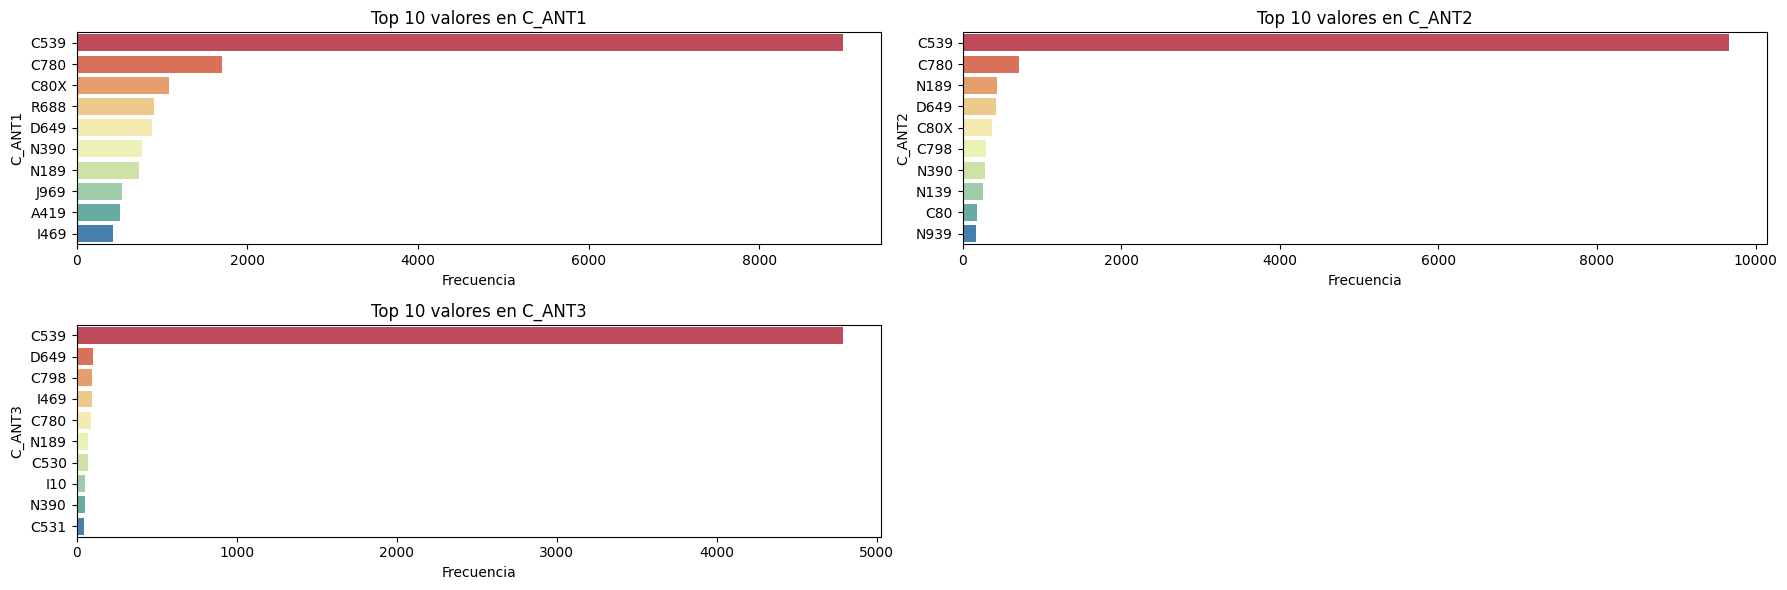

In [14]:
plt.figure(figsize=(18, 6)) 

for i, var in enumerate(variables, 1):
    frecuencia = df_juan[var].value_counts().drop(labels=['', '"'], errors='ignore').head(10)  # Excluye vacíos y comillas
    
    plt.subplot(2, 2, i)  # Crea subgráficos (1 fila, 3 columnas)
    sns.barplot(x=frecuencia.values, y=frecuencia.index, palette="Spectral")
    
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.title(f"Top 10 valores en {var}")

plt.tight_layout()  # Ajusta para que no se solapen
plt.show()

## Análisis Distribucción de los top 10

En `C_ANT1`, el valor más frecuente es `C539` (alrededor de 9000 casos), seguido de `C80X` (cerca de 3000) y `R688` (alrededor de 2000). En `C_ANT2`, `C539` también domina con más de 9000 casos, seguido de `N189` (cerca de 2000) y `D649` (alrededor de 1500). Para `C_ANT3`, `C539` sigue siendo el más común (cerca de 5000 casos), seguido de `D649` (alrededor de 2000) y `C798` (cerca de 1500).

Se observa que `C539` es consistentemente el valor más frecuente en las tres columnas, lo que sugiere que esta condición o antecedente es predominante en el conjunto de datos. 

### Cada valor en C_ANT12

<class 'pandas.core.series.Series'>
Index: 103 entries, C780 to E889
Series name: count
Non-Null Count  Dtype
--------------  -----
103 non-null    int64
dtypes: int64(1)
memory usage: 1.6+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/380555095.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/380555095.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha


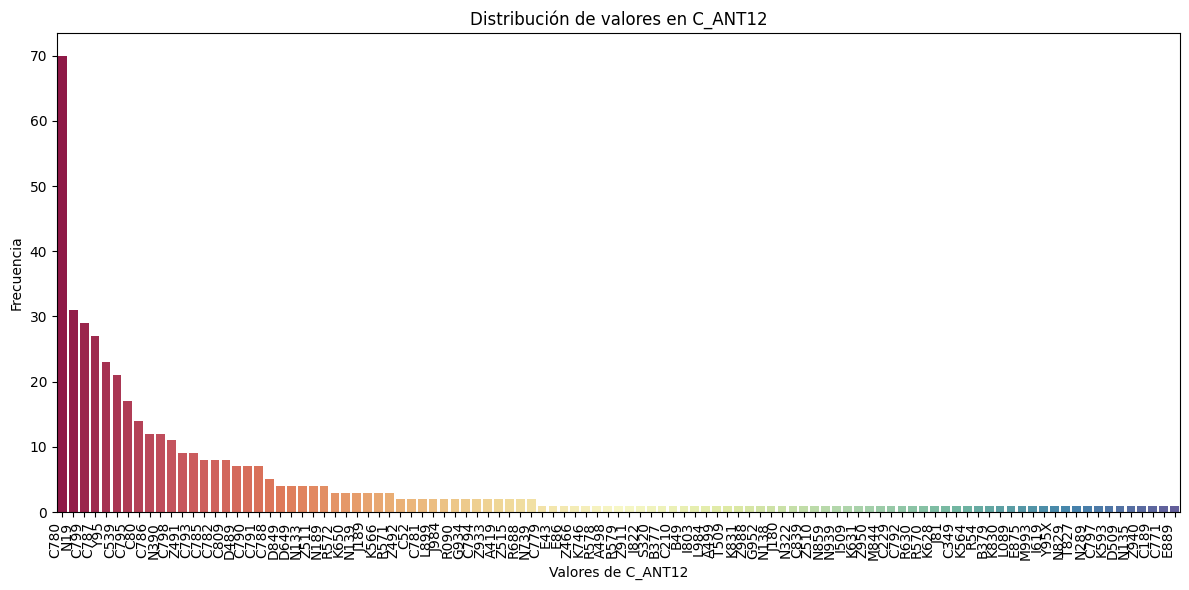

In [15]:
 
frecuencia = df_juan['C_ANT12'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia.info()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_ANT12")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_ANT12")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha

plt.tight_layout()
plt.show()

## Análisis del gráfico de distribucción `C_ANT12`

La distribución es altamente dominada con un valor que representa más del 60% de los casos (etiquetado como "C539"). 

A partir de este valor, las frecuencias disminuyen drásticamente, formando una cola larga con muchos valores que tienen frecuencias muy bajas (menores al 5%). Esto indica que `C539` es la condición o antecedente más común en los datos.

### Cada valor en C_ANT22

<class 'pandas.core.series.Series'>
Index: 98 entries, C780 to Z940
Series name: count
Non-Null Count  Dtype
--------------  -----
98 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/766218196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/766218196.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha


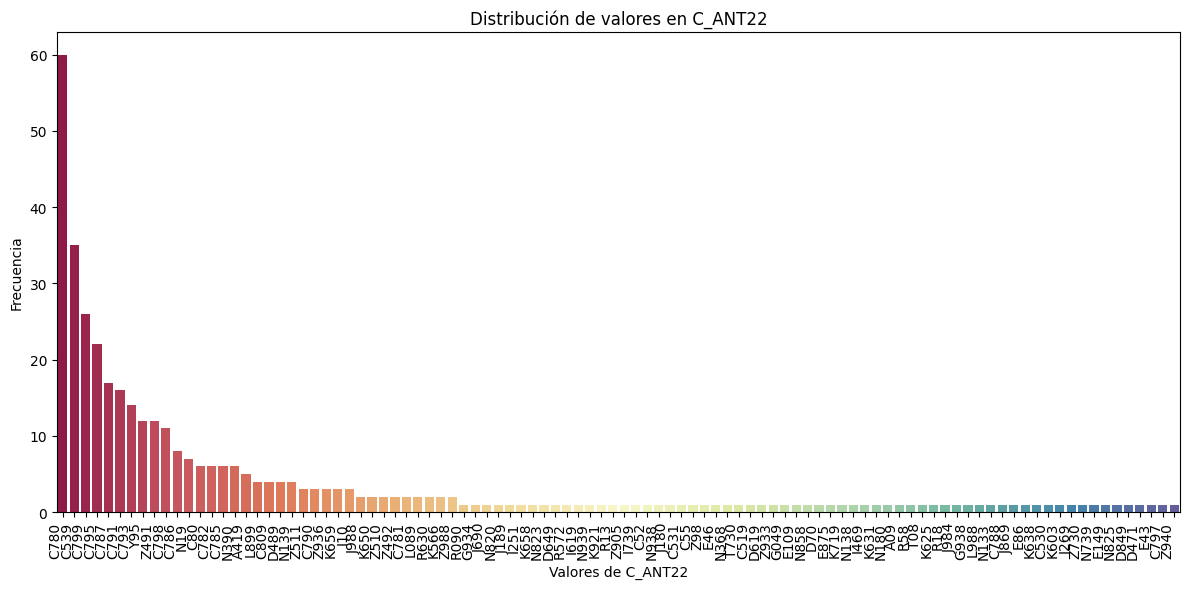

In [16]:
 
frecuencia = df_juan['C_ANT22'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia.info()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_ANT22")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_ANT22")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha

plt.tight_layout()
plt.show()

## Análisis del gráfico de distribucción `C_ANT22`

La distribución es altamente dominada con un valor (etiquetado como "C539") que representa más del 50% de los casos.

Después de este valor, las frecuencias caen rápidamente, formando una cola larga con numerosos valores que tienen frecuencias muy bajas (generalmente por debajo del 5%). Esto indica que `C539` es la condición más común en los datos.

### Cada valor en C_ANT32

<class 'pandas.core.series.Series'>
Index: 66 entries, C539 to Z515
Series name: count
Non-Null Count  Dtype
--------------  -----
66 non-null     int64
dtypes: int64(1)
memory usage: 1.0+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/3534065957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/3534065957.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha


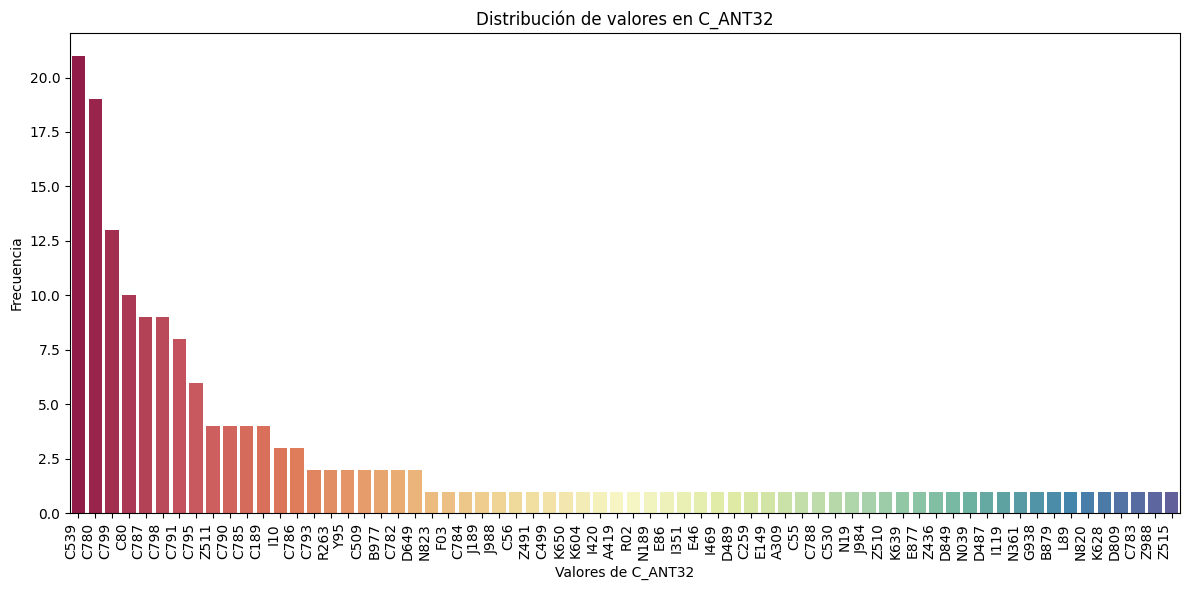

In [17]:

frecuencia = df_juan['C_ANT32'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia.info()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_ANT32")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_ANT32")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha

plt.tight_layout()
plt.show()

## Análisis del gráfico de distribucción `C_ANT32`

La distribución es altamente dominada con un valor (`C539`) que representa aproximadamente el 20% de los casos.

A partir de este valor, las frecuencias disminuyen rápidamente, formando una cola larga con muchos valores que tienen frecuencias bajas (generalmente por debajo del 2.5%). Esto indica que `C539` es la condición más común.

### Analisi para C_PAT1 y C_PAT2

/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/91768912.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_pat1.index, y=frecuencia_pat1.values, palette="Spectral", ax=ax1)
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/91768912.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/91768912.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_pat2.index, y=frecuencia_pat2.values, palette="Spectral", ax=ax2)
/var/fol

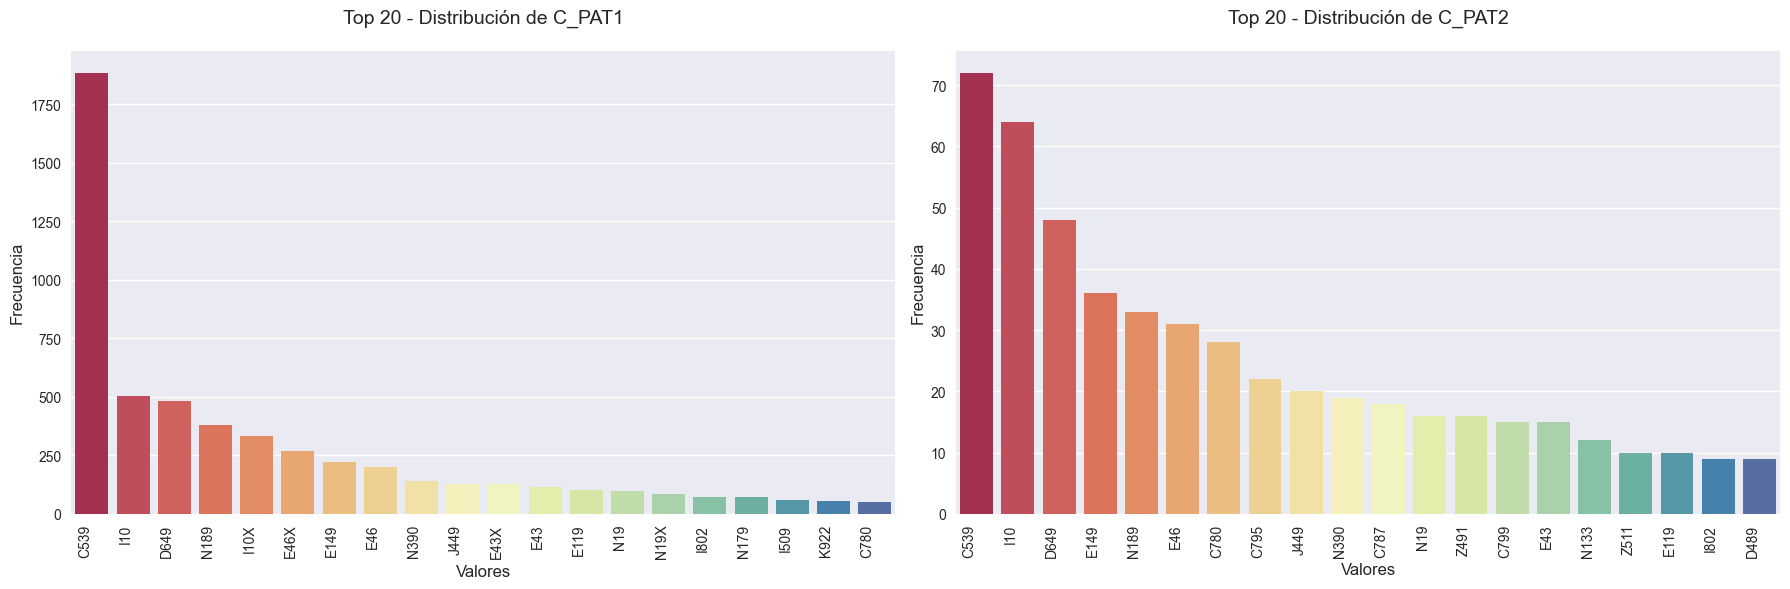

In [18]:
plt.style.use('seaborn-v0_8')  
plt.rcParams['figure.figsize'] = (14, 8)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico para C_PAT1 
frecuencia_pat1 = df_juan['C_PAT1'].value_counts().drop(labels=['', '"'], errors='ignore').head(20)
sns.barplot(x=frecuencia_pat1.index, y=frecuencia_pat1.values, palette="Spectral", ax=ax1)
ax1.set_title('Top 20 - Distribución de C_PAT1', fontsize=14, pad=20)
ax1.set_xlabel('Valores', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")

# Gráfico para C_PAT2 
frecuencia_pat2 = df_juan['C_PAT2'].value_counts().drop(labels=['', '"'], errors='ignore').head(20)
sns.barplot(x=frecuencia_pat2.index, y=frecuencia_pat2.values, palette="Spectral", ax=ax2)
ax2.set_title('Top 20 - Distribución de C_PAT2', fontsize=14, pad=20)
ax2.set_xlabel('Valores', fontsize=12)
ax2.set_ylabel('Frecuencia', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

## Análisis del gráfico de distribución de `C_PAT1` y `C_PAT2`

Distribución General  
- **`C539`** es el valor más frecuente en ambas columnas. En `C_PAT1` tiene alrededor de **1750 apariciones**, representando aproximadamente **30%** del total, mientras que en `C_PAT2` tiene cerca de **70%** de las apariciones (alrededor de 1400 casos).  
- **`I10`** y **`D649`** siguen en frecuencia en `C_PAT1` con aproximadamente **10%** y **5%**, respectivamente. En `C_PAT2`, **`I10`** y **`D649`** tienen una representación menor, con cerca de **10%** y **5%**.  

Patrones Observados  
- **Valores predominantes en ambas columnas:** Códigos como `C539`, `I10` y `D649` tienen una presencia significativa tanto en `C_PAT1` como en `C_PAT2`, indicando que estas condiciones son comunes en los datos.  
- **Valores con menor frecuencia:** En `C_PAT1`, valores como `K830`, `E46`, y `E11` tienen frecuencias muy bajas (menores a 100). En `C_PAT2`, valores como `E46`, `E13`, y `N189` también tienen baja representación.


### Cada valor en C_BAS1

C_BAS1
C539    36382
1809    13858
C530      631
C531      365
1800      137
C538       56
1808       12
1801        7
Name: count, dtype: int64


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/750162914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia_bas1.index[:20], y=frecuencia_bas1.values[:20], palette="coolwarm")  # Top 20 valores más comunes
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/750162914.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


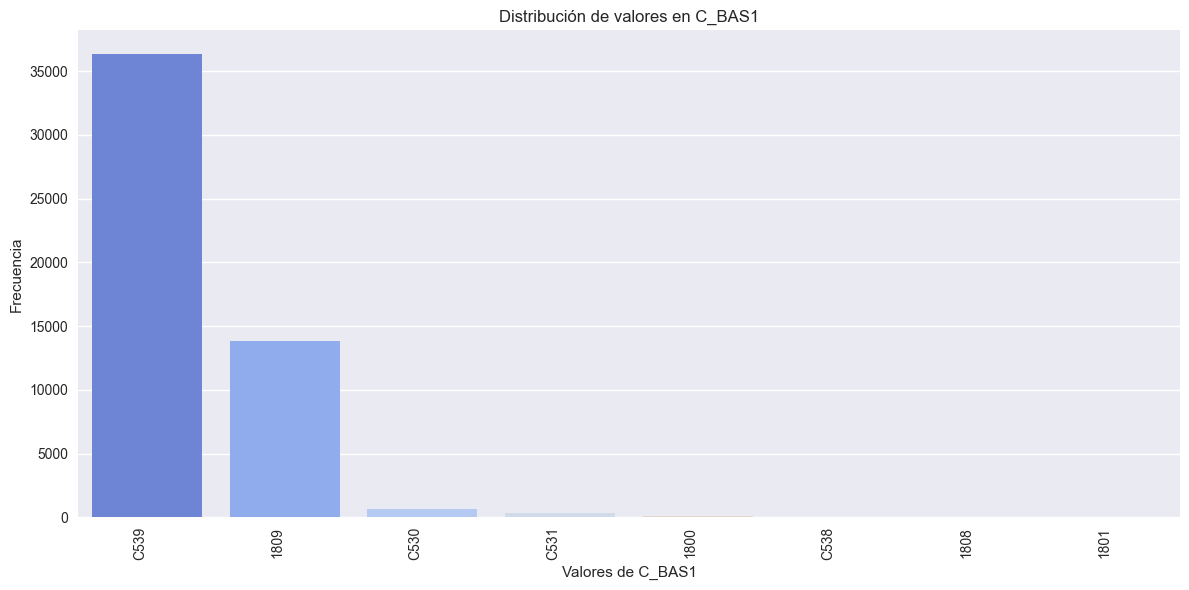

In [19]:
# Contar la frecuencia de valores en C_BAS1, excluyendo vacíos y comillas
frecuencia_bas1 = df_juan['C_BAS1'].value_counts().drop(labels=['', '"'], errors='ignore')
print(frecuencia_bas1)
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia_bas1.index[:20], y=frecuencia_bas1.values[:20], palette="coolwarm")  # Top 20 valores más comunes
plt.xlabel("Valores de C_BAS1")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_BAS1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()


## Análisis del gráfico de distribución de `C_BAS1`

Distribución General  
- **`C539`** es el valor más frecuente en `C_BAS1`, con aproximadamente **35,000 apariciones**, representando más del **60%** del total de casos.  
- **`1899`** sigue en frecuencia con cerca de **15,000 apariciones**, lo que equivale a aproximadamente **25%** del total.  
- Otros valores como `C530`, `C531`, y `1800` tienen frecuencias mucho menores, todas por debajo de **5%**, con menos de 2,000 apariciones cada uno.

Patrones Observados  
- **Valores predominantes:** `C539` y `1899` concentran la gran mayoría de los casos, mostrando una clara dominancia de estas dos categorías en los datos.  
- **Valores con baja frecuencia:** Códigos como `C530`, `C531`, `1800`, `C858`, `1898`, y `1801` tienen una representación mínima, con frecuencias cercanas a 0.


### Cada valor en C_MCM1

C_MCM1
C539    196
C538      1
C530      1
Name: count, dtype: int64


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/1462346214.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia_mcm1.index[:20], y=frecuencia_mcm1.values[:20], palette="magma")  # Top 20 valores más comunes
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/1462346214.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


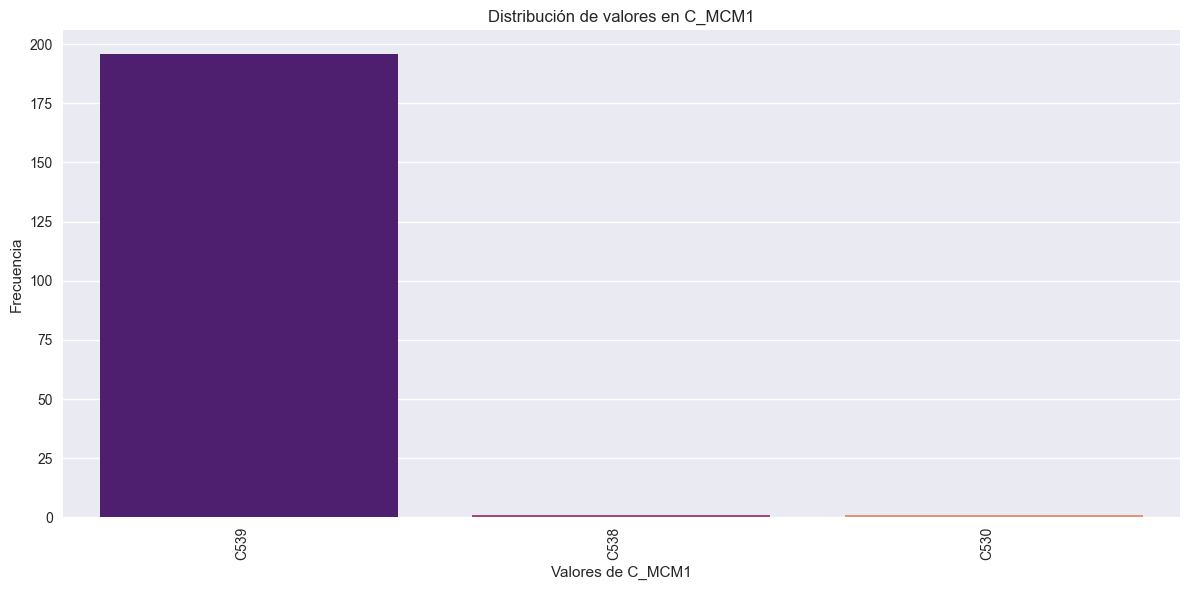

In [20]:
# Contar la frecuencia de valores en C_MCM1, excluyendo vacíos y comillas
frecuencia_mcm1 = df_juan['C_MCM1'].value_counts().drop(labels=['', '"'], errors='ignore')
print(frecuencia_mcm1)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia_mcm1.index[:20], y=frecuencia_mcm1.values[:20], palette="magma")  # Top 20 valores más comunes
plt.xlabel("Valores de C_MCM1")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_MCM1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()


## Análisis del gráfico de distribución de `C_MCM1`

Distribución General  
- **`C539`** es el valor más frecuente en `C_MCM1`, con aproximadamente **200 apariciones**, representando más del **95%** del total de casos.  
- **`C858`** y **`C530`** tienen frecuencias mucho menores, con menos de **5 apariciones** cada uno, representando menos del **2%** del total.  

### Cada valor en IDPROFCER

In [21]:
def crear_tabla_frecuencia(df, columna='IDPROFCER', excluir_valores=['', '"']):
    mapeo_categorias = {
        1: 'Médico',
        2: 'Enfermero',
        3: 'Auxiliar de enfermería',
        4: 'Promotor(a) de salud',
        5: 'Funcionario de registro civil',
        6: 'Médico Legista'
    }
    valores_validos = list(mapeo_categorias.keys()) + [9]
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    df_filtrado = df[df[columna].isin(valores_validos)]

    # Contar frecuencias y excluir valores no deseados
    frecuencia = (df_filtrado[columna]
                 .value_counts()
                 .drop(labels=[x for x in excluir_valores if x in df_filtrado[columna]], 
                       errors='ignore'))

    tabla = pd.DataFrame({
        'Valor': frecuencia.index,
        'Frecuencia': frecuencia.values
    })
    tabla['Valor'] = tabla['Valor'].apply(
        lambda x: x if x == 9 else mapeo_categorias.get(int(x) if pd.notna(x) else x, x)
    )
    total = frecuencia.sum()
    tabla['Porcentaje'] = (tabla['Frecuencia'] / total * 100).round(2)
    # Ordenar por frecuencia descendente y resetear índice
    tabla = tabla.sort_values('Frecuencia', ascending=False).reset_index(drop=True)

    return tabla


In [22]:
try:
    tabla_frecuencia = crear_tabla_frecuencia(df_juan)
    print(tabla_frecuencia)
    
except NameError:
    print("Error: El DataFrame 'df_juan' no está definido")
except Exception as e:
    print(f"Error inesperado: {str(e)}")

/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/2249799884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = pd.to_numeric(df[columna], errors='coerce')


                           Valor  Frecuencia  Porcentaje
0                         Médico       19637       99.73
1         Auxiliar de enfermería          21        0.11
2           Promotor(a) de salud          14        0.07
3                      Enfermero          11        0.06
4                            9.0           7        0.04
5  Funcionario de registro civil           1        0.01


## Análisis de la distribución de profesiones que determinaron la muerte por cáncer de cérvix (`IDPROFCER`)

Distribución General  
- **`Médico`** es la profesión más frecuente, con **19,637 casos**, representando el **99.73%** del total de determinaciones de muerte por cáncer de cérvix.  
- **`Auxiliar de enfermería`** y **`Promotor(a) de salud`** tienen frecuencias mucho menores, con **21 casos** (**0.11%**) y **14 casos** (**0.07%**) respectivamente.  
- **`Enfermero`** aparece en **11 casos** (**0.06%**), mientras que el valor **9.0** (sin información específica) se registra en **7 casos** (**0.04%**).  
- **`Funcionario de registro civil`** tiene la menor frecuencia, con solo **1 caso** (**0.01%**).

Patrones Observados  
- **Dominancia de médicos:** La gran mayoría de las determinaciones de muerte por cáncer de cérvix son realizadas por médicos, lo que refleja su rol predominante en este proceso.  
- **Casos sin información clara:** El valor 9.0 indica una pequeña proporción de casos donde no se especifica la profesión, lo que podría señalar datos incompletos.

### Cada valor en CAUSA_666_667

CAUSA_666_667
209    32460
207     3526
Name: count, dtype: int64


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/2862701962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia_causa.values, y=frecuencia_causa.index, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_46833/2862701962.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")


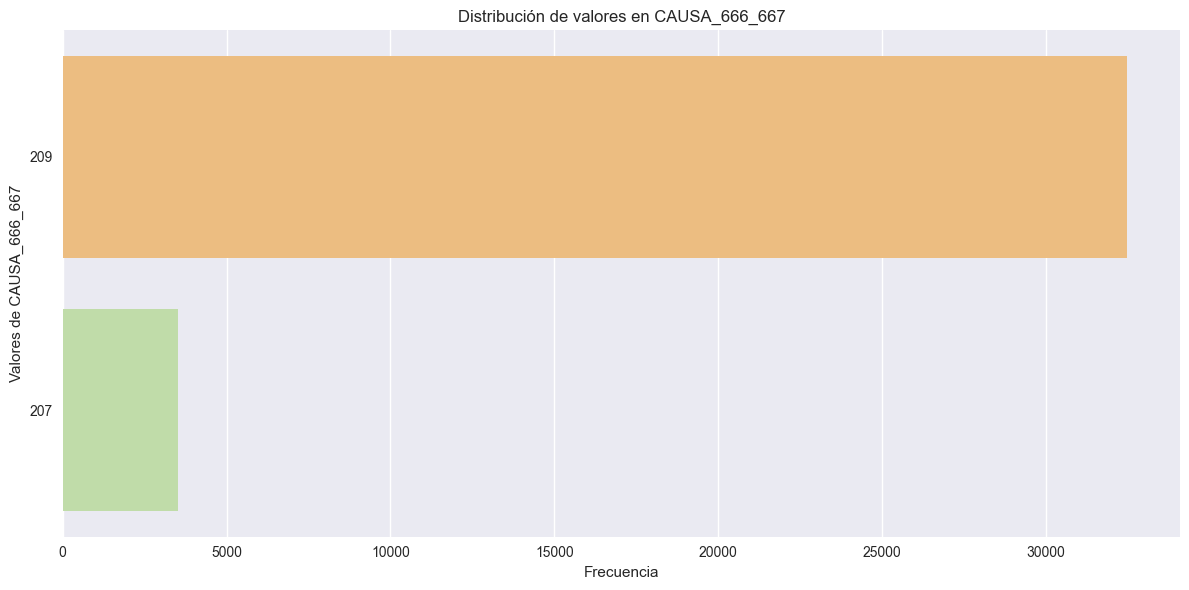

In [23]:
frecuencia_causa = df_juan['CAUSA_666_667'].value_counts().drop(labels=['', '"'], errors='ignore')
print(frecuencia_causa)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia_causa.values, y=frecuencia_causa.index, palette="Spectral")

# Configurar etiquetas y título
plt.xlabel("Frecuencia")
plt.ylabel("Valores de CAUSA_666_667")
plt.title("Distribución de valores en CAUSA_666_667")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
plt.tight_layout()
plt.show()

## Análisis del gráfico de distribución de `CAUSA_666_667`

### Distribución General  
- El valor **209** es el más frecuente en `CAUSA_666_667`, con aproximadamente **30,000 apariciones**, representando más del **90%** del total de casos.  
- El valor **207** tiene una frecuencia mucho menor, con cerca de **5,000 apariciones**, lo que equivale a aproximadamente **10%** del total.  


### Cada valor en EDAD2

In [24]:
# Calcular la frecuencia de EDAD2
frecuencia_edad = df_juan['EDAD2'].value_counts().drop(labels=['', '"'], errors='ignore')

# Estandarizar los nombres de los rangos y ordenarlos
mapeo_rangos = {
    '0A4': '0-4',
    '5a9': '5-9',
    '10a14': '10-14',
    '15a19': '15-19',
    '20a24': '20-24',
    '25a29': '25-29',
    '30a34': '30-34',
    '35a39': '35-39',
    '40a44': '40-44',
    '45a49': '45-49',
    '50a54': '50-54',
    '55a59': '55-59',
    '6064': '60-64',
    '65a69': '65-69',
    '70a74': '70-74',
    '75a79': '75-79',
    '80a84': '80-84',
    '85y+': '85+'
}

# Mapear los valores en la serie de frecuencias
frecuencia_edad.index = frecuencia_edad.index.map(mapeo_rangos)
orden_rangos = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', 
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', 
                '80-84', '85+']
frecuencia_edad = frecuencia_edad.reindex(orden_rangos)
print("Tabla de frecuencias para EDAD2 (Edad en rangos quinquenales):")
print(frecuencia_edad)

Tabla de frecuencias para EDAD2 (Edad en rangos quinquenales):
EDAD2
0-4         1
5-9         1
10-14       4
15-19    5213
20-24     197
25-29     868
30-34    2199
35-39    3555
40-44    4682
45-49    5532
50-54    4089
55-59    3926
60-64    3697
65-69    4683
70-74    4246
75-79    3522
80-84    2504
85+      2190
Name: count, dtype: int64


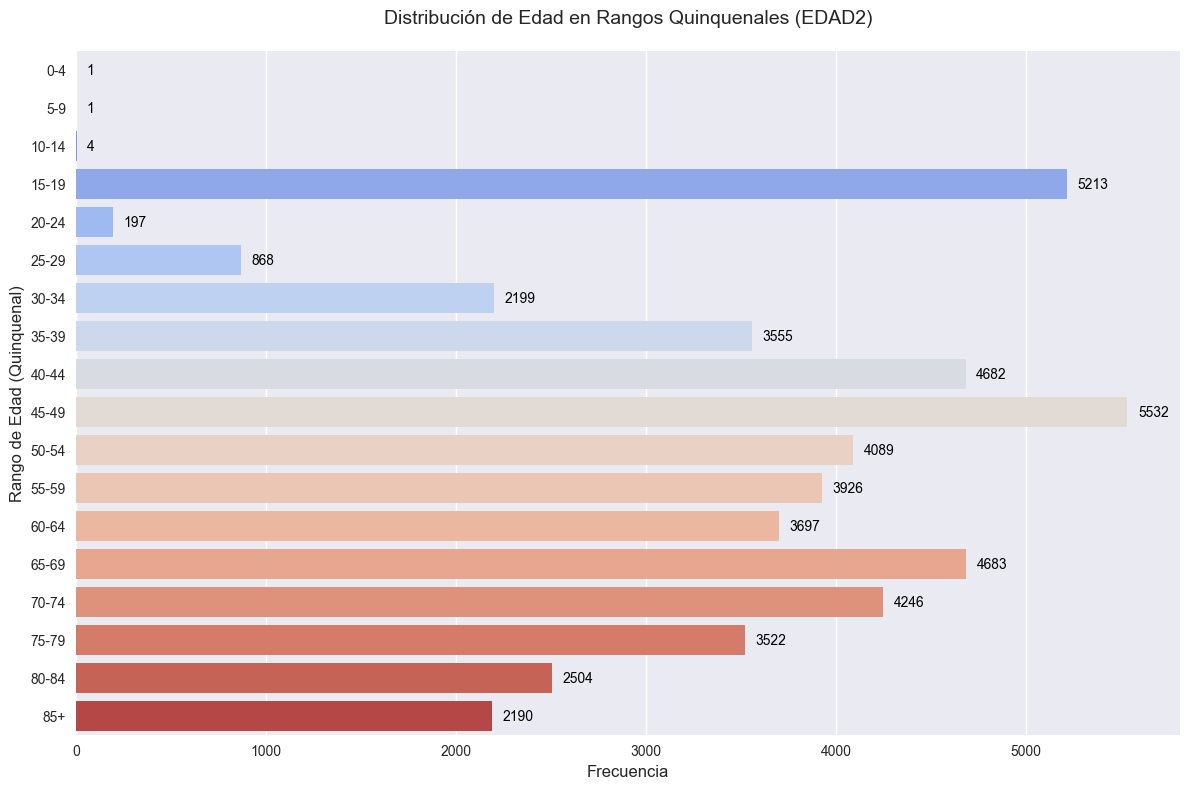

In [25]:
# Crear el gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=frecuencia_edad.values, y=frecuencia_edad.index, hue=frecuencia_edad.index, 
                 palette="coolwarm", legend=False)

# Configurar etiquetas y título
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Rango de Edad (Quinquenal)", fontsize=12)
plt.title("Distribución de Edad en Rangos Quinquenales (EDAD2)", fontsize=14, pad=20)

# Personalizar las etiquetas de los ejes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Agregar etiquetas de datos en las barras
for i, v in enumerate(frecuencia_edad.values):
    ax.text(v + max(frecuencia_edad.values) * 0.01, i, f'{int(v)}', 
            va='center', ha='left', fontsize=10, color='black')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

## Análisis del gráfico de distribución de `EDAD2` (Edad en Rangos Quinquenales)

Distribución General  
- El rango **15-19** es el más frecuente, con **5,213 casos**, representando aproximadamente el **26%** del total.  
- Los rangos **45-49** y **65-69** le siguen, con **5,532 casos** (**28%**) y **4,683 casos** (**24%**) respectivamente.  
- Los rangos más jóvenes (**0-4**, **5-9**, **10-14**) tienen las frecuencias más bajas, con **1**, **1**, y **4 casos** respectivamente, sumando menos del **0.1%** del total.  
- El rango **85+** tiene **2,190 casos**, representando cerca del **11%**.

Patrones Observados  
- **Mayor frecuencia en adultos jóvenes y mayores:** Los rangos de edad entre 15-19 y 65-69 concentran la mayoría de los casos, indicando que las personas en estas edades son las más representadas en los datos.  
- **Baja representación en menores:** Los rangos de 0-14 años tienen una presencia mínima, sugiriendo que los casos en estas edades son extremadamente raros.  
- **Distribución en edades avanzadas:** A partir de los 65 años, las frecuencias disminuyen gradualmente, con una caída notable después de los 80 años.